In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def Norm(m: np.ndarray) -> np.float32:
    if len(m.shape) == 1:
        ans = 0
        for i in range(m.shape[0]):
            ans += m[i]**2
        return ans**0.5
    else:
        ans = 0
        for i in range(m.shape[0]):
            for j in range(m.shape[0]):
                ans += m[i][j]**2
            
        return ans**0.5

In [12]:
N_MAX = 100
def Jacoby(A: np.ndarray, d: np.ndarray, eps: np.float32) -> np.ndarray:
    B = np.empty(A.shape)
    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            B[i][j] = -A[i][j]/A[i][i]
        B[i][i] = 0
    d_2 = np.empty(d.shape)
    for i in range(n):
        d_2[i] = d[i]/A[i][i]
    N_B = Norm(B)
    #print(N_B)
    k = 1 if N_B < 0.5 else (1 - N_B)/N_B
    prev = d_2
    print("x0: ", d_2)
    r0 = A.dot(d_2) - d
    print("\tr0: ", r0, "||r0||: ", Norm(r0))
    cur = B.dot(d_2) + d_2
    print("x1: ", cur)
    r1 = A.dot(cur) - d
    print("\tr1: ", r1, "||r1||: ", Norm(r1))
    i = 1
    while Norm(cur - prev) >= k*eps and i < N_MAX:
        #print(i, Norm(cur - prev))
        prev, cur =cur,  B.dot(cur) + d_2
        i += 1
        print("x^{(" + "{0})".format(i) + "} = ", cur)
        r = A.dot(cur) - d
        print("\tr^{(" + "{0})".format(i) + "} = ", r, "||r^{(" + "{0})".format(i) + "}||_e = ", "{0:.3f}".format(Norm(r)))
    return cur, i

In [17]:
def Seidel(A: np.ndarray, d: np.ndarray, eps: np.float32) -> np.ndarray:
    L = np.empty(A.shape)
    U = np.empty(A.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if i < j:
                U[i, j] = A[i, j]
                L[i, j] = 0
            else:
                U[i, j] = 0
                L[i, j] = A[i, j]
    L_inv = np.linalg.inv(L)
    d_2 = np.empty(d.shape)
    for i in range(d.shape[0]):
        d_2[i] = d[i]/A[i][i]
    print("x0: ", d_2)
    r0 = A.dot(d_2) - d
    print("\tr0: ", r0, "||r0||: ", Norm(r0))
    x = L_inv.dot(d - U.dot(d_2))
    print("x1: ", x)
    r1 = A.dot(x) - d
    print("\tr1: ", r1, "||r1||: ", Norm(r1))
    n_iter = 2
    while Norm(A.dot(x) - d) >= eps and n_iter < N_MAX:
        old = x
        x = L_inv.dot(d - U.dot(x))
        print("x^{(" + "{0})".format(n_iter) + "} = ", x)
        r = A.dot(x) - d
        print("\tr^{(" + "{0})".format(n_iter) + "} = ", r, "||r^{(" + "{0})".format(n_iter) + "}||_e = ", "{0:.3f}".format(Norm(r)))
        print(Norm(x - old))
        n_iter += 1
    return x, n_iter

In [18]:
A = np.array([[91., 5., -7., -5.],
              [-8., 96., -4., 1.],
              [-4., 0., 29., -1.],
              [-1., 9., -8., 121.]])
d = np.array([-110., 220., 675., -373.])

In [19]:
x_1 = Jacoby(A, d, 0.001)

x0:  [-1.20879121  2.29166667 23.27586207 -3.08264463]
	r0:  [-136.05947801  -86.51576323    7.91780946 -164.37310534] ||r0||:  230.38743088705084
x1:  [ 0.28636789  3.19287253 23.00283416 -1.72418921]
	r1:  [-0.37505236 -9.51070573 -7.33909181  8.799917  ] ||r1||:  14.89614029148826
x^{(2)} =  [ 0.29048934  3.29194238 23.25590629 -1.7969158 ]
	r^{(2)} =  [-0.91252273 -1.11798675  0.05624077 -1.13706984] ||r^{(2)}||_e =  1.838
x^{(3)} =  [ 0.30051707  3.30358808 23.25396695 -1.78751853]
	r^{(3)} =  [ 0.02481748 -0.06306716 -0.04950816  0.11029823] ||r^{(3)}||_e =  0.139
x^{(4)} =  [ 0.30024435  3.30424503 23.25567413 -1.78843008]
	r^{(4)} =  [-0.00410772 -0.00555851  0.00200243 -0.00747216] ||r^{(4)}||_e =  0.010
x^{(5)} =  [ 0.30028949  3.30430293 23.25560508 -1.78836833]
	r^{(5)} =  [ 4.64085012e-04 -2.31670841e-05 -2.42312478e-04  1.02836616e-03] ||r^{(5)}||_e =  0.001


In [20]:
x_2 = Seidel(A, d, 0.001)

x0:  [-1.20879121  2.29166667 23.27586207 -3.08264463]
	r0:  [-136.05947801  -86.51576323    7.91780946 -164.37310534] ||r0||:  230.38743088705084
x1:  [ 0.28636789  3.31746913 23.209063   -1.79254835]
	r1:  [-0.8538756   1.55729256 -1.29009628  0.        ] ||r1||:  2.1951337278365175
x^{(2)} =  [ 0.29575114  3.30202927 23.25484332 -1.78829558]
	r^{(2)} =  [-0.41892536 -0.17886851 -0.00425276  0.        ] ||r^{(2)}||_e =  0.456
0.04939998296179108
x^{(3)} =  [ 0.30035471  3.30427611 23.25562494 -1.78837298]
	r^{(3)} =  [ 6.14984933e-03 -3.20388901e-03  7.73970700e-05  0.00000000e+00] ||r^{(3)}||_e =  0.007
0.005182484326173157
x^{(4)} =  [ 0.30028713  3.30430385 23.25561295 -1.7883764 ]
	r^{(4)} =  [2.39716671e-04 4.45466635e-05 3.41473196e-06 0.00000000e+00] ||r^{(4)}||_e =  0.000
7.41094670292574e-05


In [21]:
x_2

(array([ 0.30028713,  3.30430385, 23.25561295, -1.7883764 ]), 5)

In [26]:
x_1

(array([ 0.30028949,  3.30430293, 23.25560508, -1.78836833]), 5)

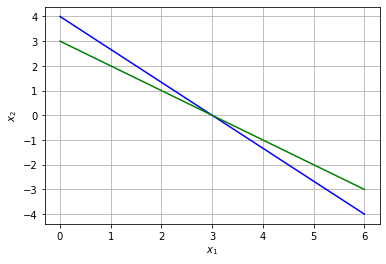

In [34]:
x_data = np.linspace(0, 6, 1000)
fig, axs = plt.subplots()
f1 = lambda x: -4*x/3 + 4
f2 = lambda x: -x + 3
axs.plot(x_data, f1(x_data), color="blue")
axs.plot(x_data, f2(x_data), color="green")
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')
axs.grid(True)
#plt.savefig('regular_calc_12.png')

In [3]:
a = [1, 2]
b = a
b += [1]
a,  b

([1, 2, 1], [1, 2, 1])